In [419]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [420]:
data_raw = pd.read_csv(r"D:\USELESS\数据分析学习\数学建模学习\2026美赛\B\references\space_missions.csv", encoding='latin1')

data = data_raw[['Date', 'MissionStatus']]
print(data.head())

         Date MissionStatus
0  1957-10-04       Success
1  1957-11-03       Success
2  1957-12-06       Failure
3  1958-02-01       Success
4  1958-02-05       Failure


In [421]:
# 1. 转换 Date 列为年份
data['year'] = pd.to_datetime(data['Date']).dt.year

# 2. 统计每年出现次数
count = data['year'].value_counts().sort_index()  # 按年份排序

# 3. 把 counts 加回 df
# 方法1：用 map
data['counts'] = data['year'].map(count)

# 4. 检查结果
print(data)

            Date MissionStatus  year  counts
0     1957-10-04       Success  1957       3
1     1957-11-03       Success  1957       3
2     1957-12-06       Failure  1957       3
3     1958-02-01       Success  1958      28
4     1958-02-05       Failure  1958      28
...          ...           ...   ...     ...
4625  2022-07-22       Success  2022      93
4626  2022-07-24       Success  2022      93
4627  2022-07-24       Success  2022      93
4628  2022-07-27       Success  2022      93
4629  2022-07-29       Success  2022      93

[4630 rows x 4 columns]


C:\Users\dudu0\AppData\Local\Temp\ipykernel_36592\2710768705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_datetime(data['Date']).dt.year
C:\Users\dudu0\AppData\Local\Temp\ipykernel_36592\2710768705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['counts'] = data['year'].map(count)


In [422]:
year_counts = data['year'].value_counts().sort_index()  # 按年份排序

# 2️⃣ 转成新的 DataFrame
df_counts = year_counts.reset_index()
df_counts.columns = ['year', 'counts']


df_counts = df_counts.iloc[59:65]
# 3️⃣ 查看结果

df_counts = pd.concat([
    df_counts,
    pd.DataFrame({'year':[2022,2023,2024,2025], 'counts':[180,223,261,322]})
], ignore_index=True)
print(df_counts)



   year  counts
0  2016      90
1  2017      92
2  2018     117
3  2019     109
4  2020     119
5  2021     157
6  2022     180
7  2023     223
8  2024     261
9  2025     322


In [423]:
X = df_counts['year'].values.reshape(-1,1)
y = df_counts['counts'].values

# 多项式变换
poly = PolynomialFeatures(degree=5)  # 5阶
X_poly = poly.fit_transform(X)

# 拟合
model = LinearRegression()
model.fit(X_poly, y)

year_future = np.arange(df_counts['year'].min(), 2051).reshape(-1,1)
X_future_poly = poly.transform(year_future)
pred_future = model.predict(X_future_poly)



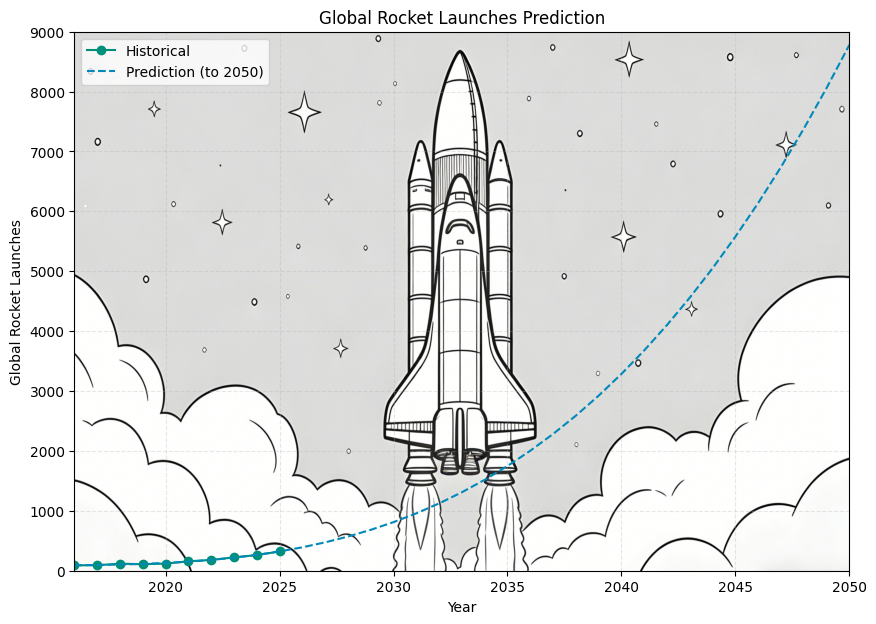

In [424]:
# 绘图
plt.figure(figsize=(10,7))

img = mpimg.imread(r"D:\USELESS\数据分析学习\数学建模学习\2026美赛\B\references\rocket_image1.png")  # 替换为你的图片路径

plt.imshow(img, extent=[df_counts['year'].min(), 2050, 0, 9000],
           aspect='auto', zorder=0)  # zorder=0 保证在最底层


# 历史数据折线
plt.plot(df_counts['year'], df_counts['counts'], marker='o', color="#008f7a", label='Historical')

# 预测数据折线
plt.plot(year_future, pred_future, color="#0089ba", linestyle='--', label='Prediction (to 2050)')

# 可选：对数纵轴，让跨度大的年份更清晰
# plt.yscale('log')

plt.xlabel('Year')
plt.ylabel('Global Rocket Launches')
plt.title('Global Rocket Launches Prediction')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.show()

In [425]:
# 预测 2050
year_2050 = np.array([[2050]])
X_2050_poly = poly.transform(year_2050)  # 注意这里用 transform
pred_2050 = model.predict(X_2050_poly)[0]


print(f"Predicted global launches in 2050: {pred_2050:.0f}")

Predicted global launches in 2050: 8782
